In [106]:
import community.community_louvain as community_louvain
import community
import networkx.algorithms.community as nxcom
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


### GOT-bookx - a dataset from HBO TV Series.


In [107]:
df = pd.read_csv('GOT-book1.csv')
df


,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
...,...,...,...,...,...
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1


Symmetric Networks (undirected). This is called a symmetric network because the relationship of the heroes is a symmetric relationship - the Source and the Target. If A is related to B, B is also related to A. Let us create the network we saw above in NetworkX.


In [108]:
G_symmetric = nx.from_pandas_edgelist(
    df, source="Source", target="Target", edge_attr='weight')
G_symmetric


In [109]:
[e for e in G_symmetric.edges]


[('Addam-Marbrand', 'Jaime-Lannister'),
 ('Addam-Marbrand', 'Tywin-Lannister'),
 ('Jaime-Lannister', 'Aerys-II-Targaryen'),
 ('Jaime-Lannister', 'Barristan-Selmy'),
 ('Jaime-Lannister', 'Brynden-Tully'),
 ('Jaime-Lannister', 'Catelyn-Stark'),
 ('Jaime-Lannister', 'Cersei-Lannister'),
 ('Jaime-Lannister', 'Eddard-Stark'),
 ('Jaime-Lannister', 'Edmure-Tully'),
 ('Jaime-Lannister', 'Galbart-Glover'),
 ('Jaime-Lannister', 'Gregor-Clegane'),
 ('Jaime-Lannister', 'Harys-Swyft'),
 ('Jaime-Lannister', 'Joffrey-Baratheon'),
 ('Jaime-Lannister', 'Jon-Arryn'),
 ('Jaime-Lannister', 'Jory-Cassel'),
 ('Jaime-Lannister', 'Kevan-Lannister'),
 ('Jaime-Lannister', 'Loras-Tyrell'),
 ('Jaime-Lannister', 'Lysa-Arryn'),
 ('Jaime-Lannister', 'Petyr-Baelish'),
 ('Jaime-Lannister', 'Renly-Baratheon'),
 ('Jaime-Lannister', 'Rickard-Karstark'),
 ('Jaime-Lannister', 'Robb-Stark'),
 ('Jaime-Lannister', 'Robert-Baratheon'),
 ('Jaime-Lannister', 'Rodrik-Cassel'),
 ('Jaime-Lannister', 'Sandor-Clegane'),
 ('Jaime-Lann

In [110]:
print("Nodes:", G_symmetric.number_of_nodes(),
      "Edges: ", G_symmetric.number_of_edges())


Nodes: 187 Edges:  684


#### Computing degree centralities.


There are four typical centrality measures: degree, closeness, eigenvector and betweenness.


The degree of a node refers to the number of ties of that vertex, or in other words, to the number of edges that are incident to that node. This definition is constant for undirected graphs in which the directions of the links are not declared.


In [111]:
G_symmetric.nodes


NodeView(('Addam-Marbrand', 'Jaime-Lannister', 'Tywin-Lannister', 'Aegon-I-Targaryen', 'Daenerys-Targaryen', 'Eddard-Stark', 'Aemon-Targaryen-(Maester-Aemon)', 'Alliser-Thorne', 'Bowen-Marsh', 'Chett', 'Clydas', 'Jeor-Mormont', 'Jon-Snow', 'Samwell-Tarly', 'Aerys-II-Targaryen', 'Brandon-Stark', 'Gerold-Hightower', 'Jon-Arryn', 'Robert-Baratheon', 'Aggo', 'Drogo', 'Jhogo', 'Jorah-Mormont', 'Quaro', 'Rakharo', 'Albett', 'Halder', 'Rast', 'Grenn', 'Pypar', 'Tyrion-Lannister', 'Alyn', 'Harwin', 'Jory-Cassel', 'Tomard', 'Arthur-Dayne', 'Arya-Stark', 'Benjen-Stark', 'Bran-Stark', 'Catelyn-Stark', 'Cersei-Lannister', 'Desmond', 'Ilyn-Payne', 'Jeyne-Poole', 'Joffrey-Baratheon', 'Meryn-Trant', 'Mordane', 'Mycah', 'Myrcella-Baratheon', 'Petyr-Baelish', 'Rickon-Stark', 'Robb-Stark', 'Rodrik-Cassel', 'Sandor-Clegane', 'Sansa-Stark', 'Syrio-Forel', 'Tommen-Baratheon', 'Vayon-Poole', 'Yoren', 'Arys-Oakheart', 'Balon-Greyjoy', 'Balon-Swann', 'Renly-Baratheon', 'Barristan-Selmy', 'Boros-Blount', 'Pyce

In [112]:
G_symmetric.degree('Addam-Marbrand')


2

This will return a value of 2, as Addam-Marbrand has met three characters in the network.


(array([139.,  19.,  13.,   4.,   5.,   3.,   2.,   1.,   0.,   1.]),
 array([ 1. ,  7.5, 14. , 20.5, 27. , 33.5, 40. , 46.5, 53. , 59.5, 66. ]),
 <BarContainer object of 10 artists>)

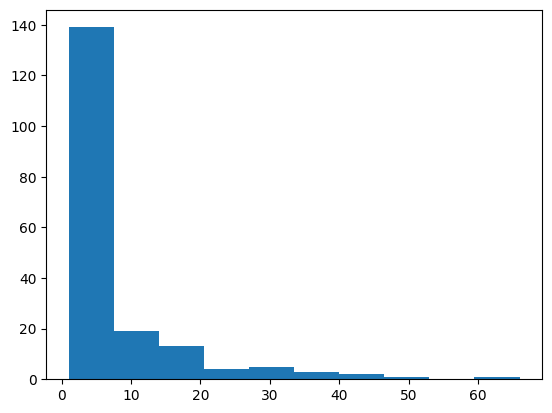

In [113]:
# Degree plot for undirected and unweighted graph
degrees = [G_symmetric.degree(n) for n in G_symmetric.nodes()]
plt.hist(degrees)


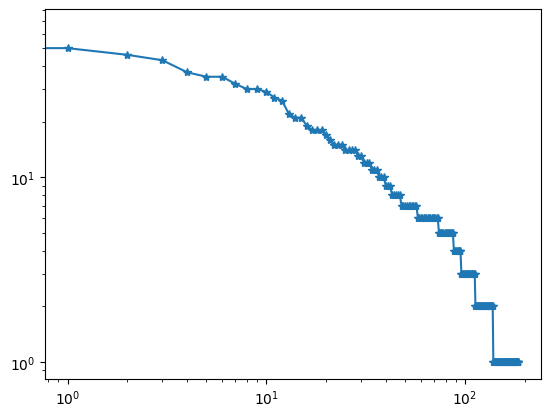

In [114]:
degree_sequence = sorted([d for n, d in G_symmetric.degree()], reverse=True)
plt.loglog(degree_sequence, marker='*')
plt.show()


In [115]:
# Degree centrality for unweighted graph
degree_centrality = nx.degree_centrality(G_symmetric)
degree_centrality


{'Addam-Marbrand': 0.010752688172043012,
 'Jaime-Lannister': 0.15591397849462366,
 'Tywin-Lannister': 0.11827956989247312,
 'Aegon-I-Targaryen': 0.010752688172043012,
 'Daenerys-Targaryen': 0.11290322580645162,
 'Eddard-Stark': 0.3548387096774194,
 'Aemon-Targaryen-(Maester-Aemon)': 0.03763440860215054,
 'Alliser-Thorne': 0.05376344086021506,
 'Bowen-Marsh': 0.02688172043010753,
 'Chett': 0.016129032258064516,
 'Clydas': 0.005376344086021506,
 'Jeor-Mormont': 0.06989247311827958,
 'Jon-Snow': 0.19892473118279572,
 'Samwell-Tarly': 0.06451612903225806,
 'Aerys-II-Targaryen': 0.03225806451612903,
 'Brandon-Stark': 0.03225806451612903,
 'Gerold-Hightower': 0.02688172043010753,
 'Jon-Arryn': 0.08064516129032259,
 'Robert-Baratheon': 0.2688172043010753,
 'Aggo': 0.03225806451612903,
 'Drogo': 0.10215053763440861,
 'Jhogo': 0.03225806451612903,
 'Jorah-Mormont': 0.06989247311827958,
 'Quaro': 0.02688172043010753,
 'Rakharo': 0.02688172043010753,
 'Albett': 0.016129032258064516,
 'Halder': 0.

In [116]:
G_symmetric.degree('Addam-Marbrand')/(17-1)


0.125

In [117]:
print("Degree centrality the network: \n",
      nx.degree_centrality(G_symmetric))


Degree centrality the network: 
 {'Addam-Marbrand': 0.010752688172043012, 'Jaime-Lannister': 0.15591397849462366, 'Tywin-Lannister': 0.11827956989247312, 'Aegon-I-Targaryen': 0.010752688172043012, 'Daenerys-Targaryen': 0.11290322580645162, 'Eddard-Stark': 0.3548387096774194, 'Aemon-Targaryen-(Maester-Aemon)': 0.03763440860215054, 'Alliser-Thorne': 0.05376344086021506, 'Bowen-Marsh': 0.02688172043010753, 'Chett': 0.016129032258064516, 'Clydas': 0.005376344086021506, 'Jeor-Mormont': 0.06989247311827958, 'Jon-Snow': 0.19892473118279572, 'Samwell-Tarly': 0.06451612903225806, 'Aerys-II-Targaryen': 0.03225806451612903, 'Brandon-Stark': 0.03225806451612903, 'Gerold-Hightower': 0.02688172043010753, 'Jon-Arryn': 0.08064516129032259, 'Robert-Baratheon': 0.2688172043010753, 'Aggo': 0.03225806451612903, 'Drogo': 0.10215053763440861, 'Jhogo': 0.03225806451612903, 'Jorah-Mormont': 0.06989247311827958, 'Quaro': 0.02688172043010753, 'Rakharo': 0.02688172043010753, 'Albett': 0.016129032258064516, 'Hald

In [118]:
# Sort for identifying most inflential nodes using degree centrality
for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
    print(node, degree_centrality[node])


Eddard-Stark 0.3548387096774194
Robert-Baratheon 0.2688172043010753
Tyrion-Lannister 0.24731182795698928
Catelyn-Stark 0.23118279569892475
Jon-Snow 0.19892473118279572
Robb-Stark 0.18817204301075272
Sansa-Stark 0.18817204301075272
Bran-Stark 0.17204301075268819
Cersei-Lannister 0.16129032258064518
Joffrey-Baratheon 0.16129032258064518
Jaime-Lannister 0.15591397849462366
Arya-Stark 0.14516129032258066
Petyr-Baelish 0.13978494623655915
Tywin-Lannister 0.11827956989247312
Daenerys-Targaryen 0.11290322580645162
Jory-Cassel 0.11290322580645162
Drogo 0.10215053763440861
Rodrik-Cassel 0.09677419354838711
Renly-Baratheon 0.09677419354838711
Luwin 0.09677419354838711
Varys 0.0913978494623656
Sandor-Clegane 0.08602150537634409
Jon-Arryn 0.08064516129032259
Theon-Greyjoy 0.08064516129032259
Lysa-Arryn 0.08064516129032259
Benjen-Stark 0.07526881720430108
Barristan-Selmy 0.07526881720430108
Pycelle 0.07526881720430108
Loras-Tyrell 0.07526881720430108
Jeor-Mormont 0.06989247311827958
Jorah-Mormont 0

In [119]:
# Calculating degree centrality from scratch
n_nodes = len(G_symmetric.nodes)
for node in G_symmetric.nodes():
    print(node, G_symmetric.degree(node)/(n_nodes-1))


Addam-Marbrand 0.010752688172043012
Jaime-Lannister 0.15591397849462366
Tywin-Lannister 0.11827956989247312
Aegon-I-Targaryen 0.010752688172043012
Daenerys-Targaryen 0.11290322580645161
Eddard-Stark 0.3548387096774194
Aemon-Targaryen-(Maester-Aemon) 0.03763440860215054
Alliser-Thorne 0.053763440860215055
Bowen-Marsh 0.026881720430107527
Chett 0.016129032258064516
Clydas 0.005376344086021506
Jeor-Mormont 0.06989247311827956
Jon-Snow 0.1989247311827957
Samwell-Tarly 0.06451612903225806
Aerys-II-Targaryen 0.03225806451612903
Brandon-Stark 0.03225806451612903
Gerold-Hightower 0.026881720430107527
Jon-Arryn 0.08064516129032258
Robert-Baratheon 0.26881720430107525
Aggo 0.03225806451612903
Drogo 0.10215053763440861
Jhogo 0.03225806451612903
Jorah-Mormont 0.06989247311827956
Quaro 0.026881720430107527
Rakharo 0.026881720430107527
Albett 0.016129032258064516
Halder 0.043010752688172046
Rast 0.03225806451612903
Grenn 0.03763440860215054
Pypar 0.03763440860215054
Tyrion-Lannister 0.24731182795698

#### Distance

We can also determine the shortest path between two nodes and its length

In [120]:
nx.shortest_path(G_symmetric, 'Jon-Snow', 'Rakharo')


['Jon-Snow', 'Eddard-Stark', 'Daenerys-Targaryen', 'Rakharo']

In [121]:
nx.shortest_path_length(G_symmetric, 'Jon-Snow', 'Rakharo')


3

#### Breadth-first search

We can find the distance of a node from every other node in the network using breadth-first search algorithm, starting from that node.

And so if we use M = nx.bfs_tree(G_symmetric, 'Jon-Snow') and now draw this tree, we will get a network structure telling how we can reach other nodes of the network starting from Jon-Snow.

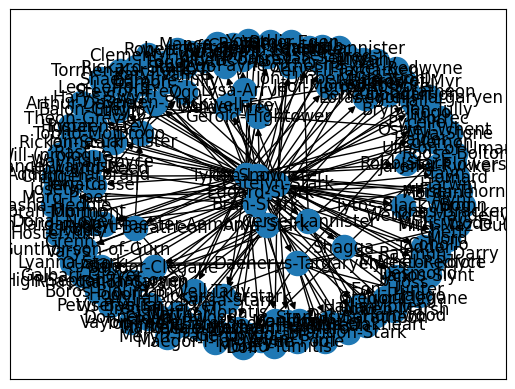

In [122]:
J = nx.bfs_tree(G_symmetric, 'Jon-Snow')
nx.draw_networkx(J)


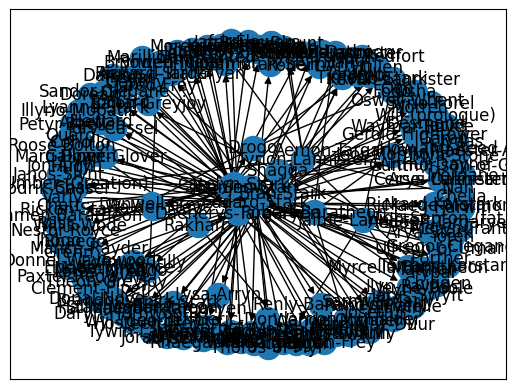

In [123]:
R = nx.bfs_tree(G_symmetric, 'Rakharo')
nx.draw_networkx(R)


#### Eccentricity

Eccentricity of a node A is defined as the largest distance between A and all other nodes.
In the symmetric employee-network, Jon-Snow has an eccentricity of 4, and Rakharo has an eccentricity of 6 (he is connected to every other node).


In [124]:
nx.eccentricity(G_symmetric, 'Jon-Snow')


4

In [125]:
nx.eccentricity(G_symmetric, 'Rakharo')


6

There are three other types of centrality measures. Closeness centrality refers to the geodesic distance of a node to the rest of nodes in the graph. Specifically, it indicates how close a node is to the others by taking the length of the shortest paths between the vertices. Eigenvector centrality takes into account the importance of the surrounding nodes and computes the centrality of a vertex based on the centrality of its neighbors. In technical words, the measure is proportional to the sum of connection centralities. Finally, betweenness centrality indicates to what extent the node is in the paths that connect many other nodes. Mathematically it is computed as the sum of the fraction of every pair of (shortest) paths that go through the analyzed node.


If we take a look to the centrality measures for every hero of the network we see that Addam-Marbrand seems to be a very important and central node of the graph, just coinciding with the above-mentioned findings based on the degree. It is not a rule that we obtain the very same trend in each of the centrality measures but it is likely that they have similar results although they are looking for different dimensions of the same construct.


In [126]:
closeness_centrality = nx.closeness_centrality(G_symmetric)
closeness_centrality


{'Addam-Marbrand': 0.3234782608695652,
 'Jaime-Lannister': 0.46153846153846156,
 'Tywin-Lannister': 0.4492753623188406,
 'Aegon-I-Targaryen': 0.3765182186234818,
 'Daenerys-Targaryen': 0.40522875816993464,
 'Eddard-Stark': 0.5636363636363636,
 'Aemon-Targaryen-(Maester-Aemon)': 0.33695652173913043,
 'Alliser-Thorne': 0.36328125,
 'Bowen-Marsh': 0.33574007220216606,
 'Chett': 0.3333333333333333,
 'Clydas': 0.25237449118046135,
 'Jeor-Mormont': 0.4161073825503356,
 'Jon-Snow': 0.493368700265252,
 'Samwell-Tarly': 0.3576923076923077,
 'Aerys-II-Targaryen': 0.38589211618257263,
 'Brandon-Stark': 0.3803680981595092,
 'Gerold-Hightower': 0.3803680981595092,
 'Jon-Arryn': 0.4376470588235294,
 'Robert-Baratheon': 0.5454545454545454,
 'Aggo': 0.2929133858267717,
 'Drogo': 0.3795918367346939,
 'Jhogo': 0.2929133858267717,
 'Jorah-Mormont': 0.37424547283702214,
 'Quaro': 0.29245283018867924,
 'Rakharo': 0.29245283018867924,
 'Albett': 0.33214285714285713,
 'Halder': 0.33574007220216606,
 'Rast': 

In [127]:
# Sort for identifying most inflential nodes using closeness_centrality
for node in sorted(closeness_centrality, key=closeness_centrality.get, reverse=True):
    print(node, closeness_centrality[node])


Eddard-Stark 0.5636363636363636
Robert-Baratheon 0.5454545454545454
Tyrion-Lannister 0.510989010989011
Catelyn-Stark 0.5054347826086957
Robb-Stark 0.49732620320855614
Jon-Snow 0.493368700265252
Sansa-Stark 0.48947368421052634
Bran-Stark 0.4869109947643979
Cersei-Lannister 0.484375
Joffrey-Baratheon 0.4806201550387597
Jaime-Lannister 0.46153846153846156
Arya-Stark 0.458128078817734
Petyr-Baelish 0.457002457002457
Rodrik-Cassel 0.45365853658536587
Theon-Greyjoy 0.45036319612590797
Tywin-Lannister 0.4492753623188406
Luwin 0.4492753623188406
Varys 0.4460431654676259
Rickon-Stark 0.4397163120567376
Jon-Arryn 0.4376470588235294
Jory-Cassel 0.43661971830985913
Renly-Baratheon 0.43457943925233644
Benjen-Stark 0.4325581395348837
Lysa-Arryn 0.4295612009237875
Gregor-Clegane 0.4189189189189189
Jeor-Mormont 0.4161073825503356
Sandor-Clegane 0.41517857142857145
Mordane 0.40611353711790393
Rickard-Karstark 0.40611353711790393
Daenerys-Targaryen 0.40522875816993464
Edmure-Tully 0.40522875816993464
St

In [128]:
eigenvector_centrality = nx.eigenvector_centrality(G_symmetric)
eigenvector_centrality


{'Addam-Marbrand': 0.016906622875341316,
 'Jaime-Lannister': 0.19495798576036363,
 'Tywin-Lannister': 0.1393904658405259,
 'Aegon-I-Targaryen': 0.01738468087953347,
 'Daenerys-Targaryen': 0.04738934960678099,
 'Eddard-Stark': 0.2964089387184345,
 'Aemon-Targaryen-(Maester-Aemon)': 0.015728915590424563,
 'Alliser-Thorne': 0.02884644061917081,
 'Bowen-Marsh': 0.015169602126328254,
 'Chett': 0.010824124243907147,
 'Clydas': 0.0007954157740942035,
 'Jeor-Mormont': 0.05708614464400136,
 'Jon-Snow': 0.17046044936828572,
 'Samwell-Tarly': 0.02786296605781483,
 'Aerys-II-Targaryen': 0.04858263408723131,
 'Brandon-Stark': 0.044018473716797464,
 'Gerold-Hightower': 0.031231471653479878,
 'Jon-Arryn': 0.12467394372126446,
 'Robert-Baratheon': 0.2694880017758137,
 'Aggo': 0.0054811307155646334,
 'Drogo': 0.02259083571954164,
 'Jhogo': 0.005712048672841409,
 'Jorah-Mormont': 0.024102672246267696,
 'Quaro': 0.0043199201608025845,
 'Rakharo': 0.004263929104536287,
 'Albett': 0.010048162713271911,
 'H

In [129]:
# Sort for identifying most inflential nodes using eigenvector_centrality
for node in sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True):
    print(node, eigenvector_centrality[node])


Eddard-Stark 0.2964089387184345
Robert-Baratheon 0.2694880017758137
Sansa-Stark 0.23155019835665291
Tyrion-Lannister 0.22520388145217876
Joffrey-Baratheon 0.22075394589376893
Cersei-Lannister 0.21643331139694158
Catelyn-Stark 0.2125500023398912
Petyr-Baelish 0.20146404432553505
Jaime-Lannister 0.19495798576036363
Bran-Stark 0.193772068228512
Robb-Stark 0.1925361235462922
Arya-Stark 0.17848320231945491
Jon-Snow 0.17046044936828572
Renly-Baratheon 0.15322872424399953
Varys 0.1504425858349402
Jory-Cassel 0.14468019419020758
Tywin-Lannister 0.1393904658405259
Rodrik-Cassel 0.1363957353262088
Sandor-Clegane 0.13458575177273222
Jon-Arryn 0.12467394372126446
Barristan-Selmy 0.123027188772949
Pycelle 0.12219169081693489
Stannis-Baratheon 0.10945155967262633
Loras-Tyrell 0.1078658880801616
Theon-Greyjoy 0.10563256306460304
Mordane 0.10338831776958499
Luwin 0.10255033886172547
Gregor-Clegane 0.10138445097297555
Lysa-Arryn 0.09529568210346989
Rickon-Stark 0.0911971493584744
Benjen-Stark 0.0906742

In [130]:
betweenness_centrality = nx.betweenness_centrality(G_symmetric)
betweenness_centrality


{'Addam-Marbrand': 0.0,
 'Jaime-Lannister': 0.0320095542681723,
 'Tywin-Lannister': 0.026190475931508066,
 'Aegon-I-Targaryen': 0.0,
 'Daenerys-Targaryen': 0.08627015537511595,
 'Eddard-Stark': 0.2696038913836117,
 'Aemon-Targaryen-(Maester-Aemon)': 0.010844715683425361,
 'Alliser-Thorne': 0.005026701469957172,
 'Bowen-Marsh': 0.0,
 'Chett': 0.0,
 'Clydas': 0.0,
 'Jeor-Mormont': 0.028345621007255038,
 'Jon-Snow': 0.17158135899829566,
 'Samwell-Tarly': 0.014449634885820021,
 'Aerys-II-Targaryen': 0.00048173749786653005,
 'Brandon-Stark': 0.002080261918971597,
 'Gerold-Hightower': 0.02144725370531822,
 'Jon-Arryn': 0.012525043642810938,
 'Robert-Baratheon': 0.21403028397371796,
 'Aggo': 7.265329845975008e-05,
 'Drogo': 0.06481224290874964,
 'Jhogo': 4.359197907585004e-05,
 'Jorah-Mormont': 0.012611106728154204,
 'Quaro': 2.906131938390003e-05,
 'Rakharo': 3.390487261455003e-05,
 'Albett': 0.0,
 'Halder': 0.0002102102102102102,
 'Rast': 7.749685169040008e-05,
 'Grenn': 0.00020246052504117

In [131]:
# Sort for identifying most inflential nodes using betweenness centrality
for node in sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True):
    print(node, betweenness_centrality[node])


Eddard-Stark 0.2696038913836117
Robert-Baratheon 0.21403028397371796
Tyrion-Lannister 0.1902124972697492
Jon-Snow 0.17158135899829566
Catelyn-Stark 0.1513952715347627
Daenerys-Targaryen 0.08627015537511595
Robb-Stark 0.07298399629664767
Drogo 0.06481224290874964
Bran-Stark 0.05579958811784442
Sansa-Stark 0.03714483664326785
Benjen-Stark 0.03293306050027417
Walder-Frey 0.032338618467650716
Jaime-Lannister 0.0320095542681723
Jeor-Mormont 0.028345621007255038
Cersei-Lannister 0.026434677939526103
Tywin-Lannister 0.026190475931508066
Loras-Tyrell 0.022409577164998796
Shagga 0.02159256030223772
Gerold-Hightower 0.02144725370531822
Danwell-Frey 0.02138913106655042
Edmure-Tully 0.01963307983379491
Joffrey-Baratheon 0.018949350296839806
Lysa-Arryn 0.01821323157123013
Jory-Cassel 0.01752453849363612
Arya-Stark 0.017495289470929955
Samwell-Tarly 0.014449634885820021
Luwin 0.013182650228125651
Jorah-Mormont 0.012611106728154204
Jon-Arryn 0.012525043642810938
Aemon-Targaryen-(Maester-Aemon) 0.0108

#### Clustering


Finding all the maximal cliques in an undirected graph


It is observed that people who share connections in a social network tend to form associations. In other words, there is a tendency in a social network to form clusters.

One of the greatest potentials of SNA is the ability to identify how nodes are interconnected and thus define communities within a graph. This is to say that most of the time the nodes and edges in our network are not distributed homogeneously, but they tend to form clusters that can later be interpreted. Many social and communication questions may arise when clustering a network. The identification of subgroups can tell us how diverse and fragmented a network is, or how the behavior of a specific community relates to other groups and to the entire graph.


A first step towards an analysis of subgroups within a network is to find the available complete subgraphs in an undirected graph. These independent subgraphs are called cliques and refer to subgroups where every vertex is connected to every other vertex. We can find the maximal cliques (a clique is maximal when it cannot be extended to a bigger clique) in our undirected graph of the book characters (G_symmetric). As we can see below, we obtain a total of 245 subgraphs.


In [132]:
print("Number of cliques: ",
      nx.graph_number_of_cliques(G_symmetric))
print("Cliques: ", list(nx.find_cliques(G_symmetric)))


Number of cliques:  245
Cliques:  [['Addam-Marbrand', 'Tywin-Lannister', 'Jaime-Lannister'], ['Todder', 'Jon-Snow', 'Pypar', 'Halder', 'Grenn'], ['Chella', 'Tyrion-Lannister'], ['Bronn', 'Tyrion-Lannister', 'Shae'], ['Bronn', 'Tyrion-Lannister', 'Shagga'], ['Bronn', 'Tyrion-Lannister', 'Catelyn-Stark', 'Marillion', 'Willis-Wode', 'Rodrik-Cassel'], ['Bronn', 'Tyrion-Lannister', 'Catelyn-Stark', 'Vardis-Egen'], ['Bronn', 'Tyrion-Lannister', 'Catelyn-Stark', 'Tywin-Lannister'], ['Bronn', 'Tyrion-Lannister', 'Chiggen', 'Willis-Wode'], ['Hugh', 'Jon-Arryn'], ['Leo-Lefford', 'Tyrion-Lannister'], ['Lyn-Corbray', 'Lysa-Arryn'], ['Maegor-I-Targaryen', 'Sansa-Stark'], ['Waymar-Royce', 'Gared', 'Will-(prologue)'], ['Waymar-Royce', 'Benjen-Stark'], ['Rakharo', 'Drogo', 'Daenerys-Targaryen', 'Quaro', 'Aggo'], ['Rakharo', 'Drogo', 'Daenerys-Targaryen', 'Haggo'], ['Harys-Swyft', 'Jaime-Lannister'], ['Gared', 'Jeor-Mormont'], ['Stiv', 'Bran-Stark', 'Robb-Stark'], ['Rickard-Stark', 'Brandon-Stark'], ['

In the symmetric characters-network, you will find that Lysa-Arryn has a local clustering coefficient of 0.4 and Catelyn-Stark has a local clustering coefficient of 0.19.



The average clustering coefficient(sum of all the local clustering coefficients divided by the number of nodes) for the symmetric employee-network is 0.51.


In [133]:
nx.clustering(G_symmetric, 'Lysa-Arryn')


0.4

In [134]:
nx.clustering(G_symmetric, 'Catelyn-Stark')


0.1937984496124031

In [135]:
nx.average_clustering(G_symmetric)


0.5121189412047715

Now, in order to properly detect communities we will apply some common algorithms to obtain the most likely subgroups in a social network. The first of these models is the so called edge-between or Girvan–Newman algorithm Newman and Girvan, 2004. This algorithm is based on divisive hierarchical clustering by breaking down the graph into pieces and iteratively removing edges from the original one. Specifically, the Girvan–Newman approach uses the betweenness centrality measure to remove the most central edge at each iteration.


##### Community detection with Girvan–Newman


In [136]:
cluster1 = nxcom.girvan_newman(G_symmetric)
c1 = next(cluster1)
print(f"Girvan-Neuman:\nLength {len(c1)}")
print(f"Modularity: "
      f"{nxcom.modularity(G_symmetric, c1):.2f}")
print(f"Membership: {c1}")


Girvan-Neuman:
Length 2
Modularity: 0.19
Membership: ({'Addam-Marbrand', 'High-Septon-(fat_one)', 'Brandon-Stark', 'Tywin-Lannister', 'Todder', 'Chella', 'Alyn', 'Robb-Stark', 'Balon-Greyjoy', 'Bronn', 'Barristan-Selmy', 'Aerys-II-Targaryen', 'Jory-Cassel', 'Pycelle', 'Hugh', 'Leo-Lefford', 'Lyn-Corbray', 'Harwin', 'Harys-Swyft', 'Maegor-I-Targaryen', 'Waymar-Royce', 'Gared', 'Stiv', 'Gregor-Clegane', 'Raymun-Darry', 'Rickard-Stark', 'Grenn', 'Mycah', 'Porther', 'Galbart-Glover', 'Will-(prologue)', 'Balon-Swann', 'Donnel-Waynwood', 'Timett', 'Conn', 'Thoros-of-Myr', 'Clydas', 'Maege-Mormont', 'Paxter-Redwyne', 'Joss', 'Lancel-Lannister', 'Lysa-Arryn', 'Danwell-Frey', 'Edmure-Tully', 'Jon-Arryn', 'Petyr-Baelish', 'Samwell-Tarly', 'Kevan-Lannister', 'Hoster-Tully', 'Hobb', 'Stannis-Baratheon', 'Donal-Noye', 'Dywen', 'Joseth', 'Stevron-Frey', 'Hosteen-Frey', 'Lyanna-Stark', 'Arys-Oakheart', 'Dareon', 'Theon-Greyjoy', 'Marillion', 'Gerold-Hightower', 'Bowen-Marsh', 'Jon-Snow', 'Moreo-Tumit

We can estimate the communities for our network using many other more clustering algorithms, such as the Louvain algorithm, the Propagating Label algorithm, and Greedy Optimization, among others. Similar to Girvan–Newman, the Louvain algorithm uses the measure of modularity to obtain a multi-level optimization Blondel et al., 2008 and its goal is to obtain optimized clusters which minimize the number of edges between the communities and maximize the number of edges within the same community. For its part, the Greedy Optimization algorithm is also based on the modularity indicator Clauset et al., 2004. It does not consider the edges' weights and works by initially setting each vertex in its own community and then joining two communities to increase modularity until obtaining the maximum modularity. Finally, the Propagating Label algorithm – which takes into account edges' weights – initializes each node with a unique label and then iteratively each vertex adopts the label of its neighbors until all nodes have the most common label of their neighbors Raghavan et al., 2007. The process can be conducted asynchronously (as done in our example), synchronously or semi-synchronously (it might produce different results).


##### Community detection with Louvain Propagating Label and Greedy Optimization


In [137]:
print("Louvain")
cluster2 = community_louvain.best_partition(G_symmetric)
print("Length: "
      f"{float(len(set(cluster2.values())))}")
print("Modularity: "
      f"{community_louvain.modularity(cluster2, G_symmetric):.2f}")
print(f"Membership: {cluster2}")


Louvain
Length: 8.0
Modularity: 0.52
Membership: {'Addam-Marbrand': 0, 'Jaime-Lannister': 0, 'Tywin-Lannister': 0, 'Aegon-I-Targaryen': 1, 'Daenerys-Targaryen': 1, 'Eddard-Stark': 6, 'Aemon-Targaryen-(Maester-Aemon)': 3, 'Alliser-Thorne': 3, 'Bowen-Marsh': 3, 'Chett': 3, 'Clydas': 3, 'Jeor-Mormont': 3, 'Jon-Snow': 3, 'Samwell-Tarly': 3, 'Aerys-II-Targaryen': 6, 'Brandon-Stark': 6, 'Gerold-Hightower': 6, 'Jon-Arryn': 6, 'Robert-Baratheon': 6, 'Aggo': 1, 'Drogo': 1, 'Jhogo': 1, 'Jorah-Mormont': 1, 'Quaro': 1, 'Rakharo': 1, 'Albett': 3, 'Halder': 3, 'Rast': 3, 'Grenn': 3, 'Pypar': 3, 'Tyrion-Lannister': 0, 'Alyn': 6, 'Harwin': 6, 'Jory-Cassel': 6, 'Tomard': 6, 'Arthur-Dayne': 6, 'Arya-Stark': 5, 'Benjen-Stark': 3, 'Bran-Stark': 7, 'Catelyn-Stark': 0, 'Cersei-Lannister': 6, 'Desmond': 5, 'Ilyn-Payne': 5, 'Jeyne-Poole': 5, 'Joffrey-Baratheon': 5, 'Meryn-Trant': 5, 'Mordane': 5, 'Mycah': 5, 'Myrcella-Baratheon': 5, 'Petyr-Baelish': 6, 'Rickon-Stark': 7, 'Robb-Stark': 7, 'Rodrik-Cassel': 0, '

In [138]:
print("\nGreedy optimization")
cluster3 = nxcom.greedy_modularity_communities(G_symmetric)
c3 = sorted(cluster3, key=len, reverse=True)
print(f"Length {len(c3)}")
print("Modularity:"
      f"{nxcom.modularity(G_symmetric, c3):.2f}")
print(f"Membership: {c3}")



Greedy optimization
Length 7
Modularity:0.44
Membership: [frozenset({'Masha-Heddle', 'Addam-Marbrand', 'Mychel-Redfort', 'Hallis-Mollen', 'Eon-Hunter', 'Kurleket', 'Tywin-Lannister', 'Roose-Bolton', 'Vardis-Egen', 'Kevan-Lannister', 'Gunthor-son-of-Gurn', 'Chella', 'Brynden-Tully', 'Hoster-Tully', 'Jon-Umber-(Greatjon)', 'Robb-Stark', 'Willis-Wode', 'Bronn', 'Chiggen', 'Morrec', 'Tyrion-Lannister', 'Jory-Cassel', 'Joseth', 'Stevron-Frey', 'Colemon', 'Jaime-Lannister', 'Shae', 'Lyn-Corbray', 'Leo-Lefford', 'Hullen', 'Harys-Swyft', 'Mord', 'Robert-Arryn', 'Catelyn-Stark', 'Stiv', 'Theon-Greyjoy', 'Rodrik-Cassel', 'Nan', 'Galbart-Glover', 'Marillion', 'Donnel-Waynwood', 'Bran-Stark', 'Rickard-Karstark', 'Tytos-Blackwood', 'Osha', 'Moreo-Tumitis', 'Hali', 'Jonos-Bracken', 'Hodor', 'Nestor-Royce', 'Maege-Mormont', 'Rickon-Stark', 'Mya-Stone', 'Wendel-Manderly', 'Jyck', 'Wyl-(guard)', 'Walder-Frey', 'Heward', 'Luwin', 'Lysa-Arryn', 'Edmure-Tully'}), frozenset({'Boros-Blount', 'Jon-Arryn', '

In [139]:
print("\nPropagating label: ")
cluster4 = nxcom.asyn_lpa_communities(G_symmetric)
c4 = sorted(cluster4, key=len, reverse=True)
print("Length: ", len(c4))
print("Modularity:"
      f"{nxcom.modularity(G_symmetric, c4):.2f}")
print("Membership: ", c4)



Propagating label: 
Length:  10
Modularity:0.32
Membership:  [{'Addam-Marbrand', 'High-Septon-(fat_one)', 'Brandon-Stark', 'Tywin-Lannister', 'Alyn', 'Chella', 'Robb-Stark', 'Balon-Greyjoy', 'Bronn', 'Barristan-Selmy', 'Aerys-II-Targaryen', 'Jory-Cassel', 'Pycelle', 'Hugh', 'Leo-Lefford', 'Lyn-Corbray', 'Harwin', 'Harys-Swyft', 'Maegor-I-Targaryen', 'Stiv', 'Gregor-Clegane', 'Rickard-Stark', 'Raymun-Darry', 'Mycah', 'Porther', 'Galbart-Glover', 'Balon-Swann', 'Donnel-Waynwood', 'Thoros-of-Myr', 'Maege-Mormont', 'Joss', 'Lancel-Lannister', 'Lysa-Arryn', 'Edmure-Tully', 'Jon-Arryn', 'Petyr-Baelish', 'Kevan-Lannister', 'Hoster-Tully', 'Stannis-Baratheon', 'Joseth', 'Stevron-Frey', 'Lyanna-Stark', 'Arys-Oakheart', 'Theon-Greyjoy', 'Marillion', 'Gerold-Hightower', 'Moreo-Tumitis', 'Hodor', 'Nestor-Royce', 'Walder-Frey', 'Heward', 'Mychel-Redfort', 'Eon-Hunter', 'Marq-Piper', 'Clement-Piper', 'Roose-Bolton', 'Willis-Wode', 'Meryn-Trant', 'Tyrion-Lannister', 'Jaime-Lannister', 'Shae', 'Arya-

We can plot each of those clusters for better visualization of the communities. We generate the plots with the Louvain algorithm in Python.


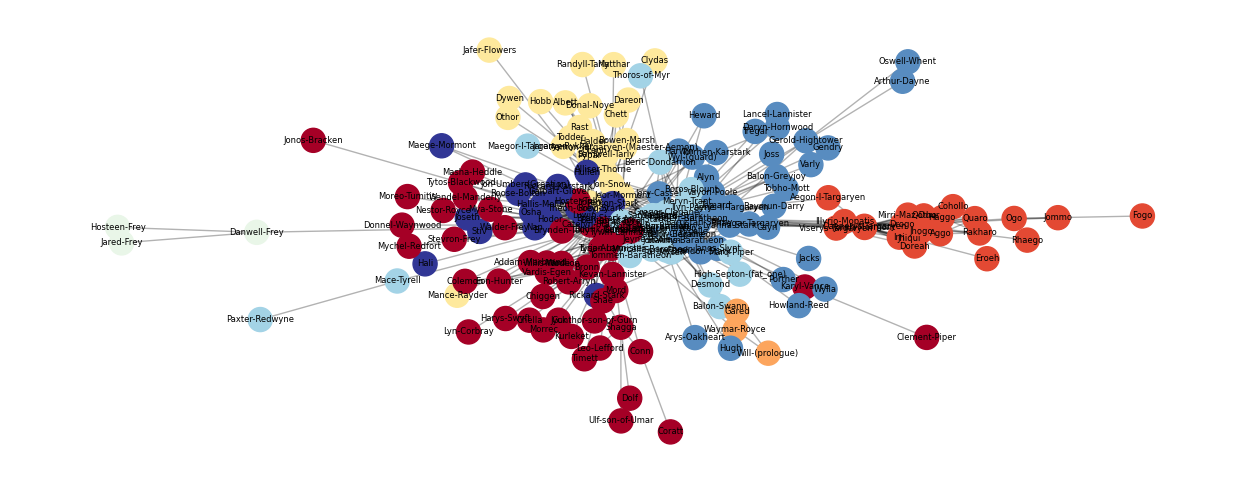

In [140]:
# Plot with Louvain algortihm
pos = nx.spring_layout(G_symmetric)
plt.figure(figsize=(16, 6))
plt.axis("off")
nx.draw_networkx_labels(G_symmetric, pos, font_size=6)
nx.draw_networkx_nodes(G_symmetric, pos,
                       cmap=plt.cm.RdYlBu,
                       node_color=list(cluster2.values()))
nx.draw_networkx_edges(G_symmetric, pos, alpha=0.3)
plt.show(G_symmetric)


### Network data visualization


Basic visualization of the of HBO TV Series.


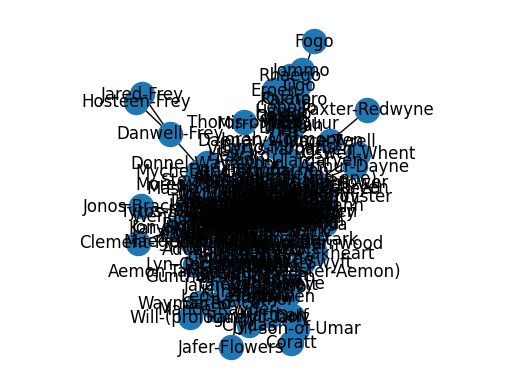

In [141]:
nx.draw_networkx(G_symmetric)

pos = nx.shell_layout(G_symmetric)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.40
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.box(False)
plt.show()


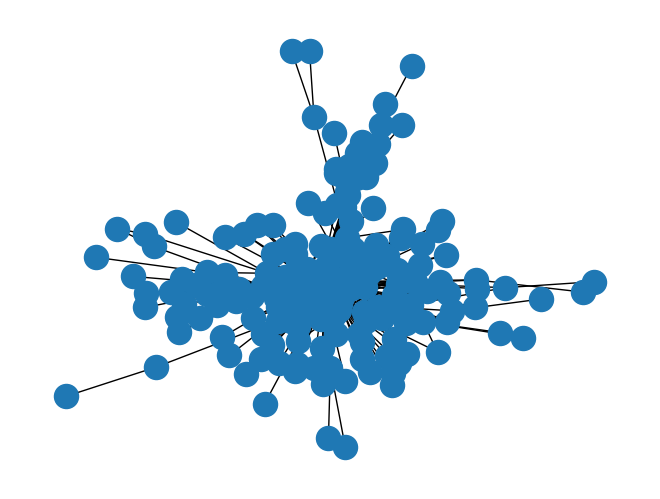

In [142]:
nx.draw(G_symmetric)


In [143]:
G_symmetric.nodes()


NodeView(('Addam-Marbrand', 'Jaime-Lannister', 'Tywin-Lannister', 'Aegon-I-Targaryen', 'Daenerys-Targaryen', 'Eddard-Stark', 'Aemon-Targaryen-(Maester-Aemon)', 'Alliser-Thorne', 'Bowen-Marsh', 'Chett', 'Clydas', 'Jeor-Mormont', 'Jon-Snow', 'Samwell-Tarly', 'Aerys-II-Targaryen', 'Brandon-Stark', 'Gerold-Hightower', 'Jon-Arryn', 'Robert-Baratheon', 'Aggo', 'Drogo', 'Jhogo', 'Jorah-Mormont', 'Quaro', 'Rakharo', 'Albett', 'Halder', 'Rast', 'Grenn', 'Pypar', 'Tyrion-Lannister', 'Alyn', 'Harwin', 'Jory-Cassel', 'Tomard', 'Arthur-Dayne', 'Arya-Stark', 'Benjen-Stark', 'Bran-Stark', 'Catelyn-Stark', 'Cersei-Lannister', 'Desmond', 'Ilyn-Payne', 'Jeyne-Poole', 'Joffrey-Baratheon', 'Meryn-Trant', 'Mordane', 'Mycah', 'Myrcella-Baratheon', 'Petyr-Baelish', 'Rickon-Stark', 'Robb-Stark', 'Rodrik-Cassel', 'Sandor-Clegane', 'Sansa-Stark', 'Syrio-Forel', 'Tommen-Baratheon', 'Vayon-Poole', 'Yoren', 'Arys-Oakheart', 'Balon-Greyjoy', 'Balon-Swann', 'Renly-Baratheon', 'Barristan-Selmy', 'Boros-Blount', 'Pyce

In [144]:
G_symmetric.edges()


EdgeView([('Addam-Marbrand', 'Jaime-Lannister'), ('Addam-Marbrand', 'Tywin-Lannister'), ('Jaime-Lannister', 'Aerys-II-Targaryen'), ('Jaime-Lannister', 'Barristan-Selmy'), ('Jaime-Lannister', 'Brynden-Tully'), ('Jaime-Lannister', 'Catelyn-Stark'), ('Jaime-Lannister', 'Cersei-Lannister'), ('Jaime-Lannister', 'Eddard-Stark'), ('Jaime-Lannister', 'Edmure-Tully'), ('Jaime-Lannister', 'Galbart-Glover'), ('Jaime-Lannister', 'Gregor-Clegane'), ('Jaime-Lannister', 'Harys-Swyft'), ('Jaime-Lannister', 'Joffrey-Baratheon'), ('Jaime-Lannister', 'Jon-Arryn'), ('Jaime-Lannister', 'Jory-Cassel'), ('Jaime-Lannister', 'Kevan-Lannister'), ('Jaime-Lannister', 'Loras-Tyrell'), ('Jaime-Lannister', 'Lysa-Arryn'), ('Jaime-Lannister', 'Petyr-Baelish'), ('Jaime-Lannister', 'Renly-Baratheon'), ('Jaime-Lannister', 'Rickard-Karstark'), ('Jaime-Lannister', 'Robb-Stark'), ('Jaime-Lannister', 'Robert-Baratheon'), ('Jaime-Lannister', 'Rodrik-Cassel'), ('Jaime-Lannister', 'Sandor-Clegane'), ('Jaime-Lannister', 'Sansa-S

In [145]:
G_symmetric.edges.data()


EdgeDataView([('Addam-Marbrand', 'Jaime-Lannister', {'weight': 3}), ('Addam-Marbrand', 'Tywin-Lannister', {'weight': 6}), ('Jaime-Lannister', 'Aerys-II-Targaryen', {'weight': 5}), ('Jaime-Lannister', 'Barristan-Selmy', {'weight': 4}), ('Jaime-Lannister', 'Brynden-Tully', {'weight': 7}), ('Jaime-Lannister', 'Catelyn-Stark', {'weight': 9}), ('Jaime-Lannister', 'Cersei-Lannister', {'weight': 16}), ('Jaime-Lannister', 'Eddard-Stark', {'weight': 27}), ('Jaime-Lannister', 'Edmure-Tully', {'weight': 4}), ('Jaime-Lannister', 'Galbart-Glover', {'weight': 3}), ('Jaime-Lannister', 'Gregor-Clegane', {'weight': 3}), ('Jaime-Lannister', 'Harys-Swyft', {'weight': 3}), ('Jaime-Lannister', 'Joffrey-Baratheon', {'weight': 12}), ('Jaime-Lannister', 'Jon-Arryn', {'weight': 5}), ('Jaime-Lannister', 'Jory-Cassel', {'weight': 4}), ('Jaime-Lannister', 'Kevan-Lannister', {'weight': 4}), ('Jaime-Lannister', 'Loras-Tyrell', {'weight': 3}), ('Jaime-Lannister', 'Lysa-Arryn', {'weight': 6}), ('Jaime-Lannister', 'Pe

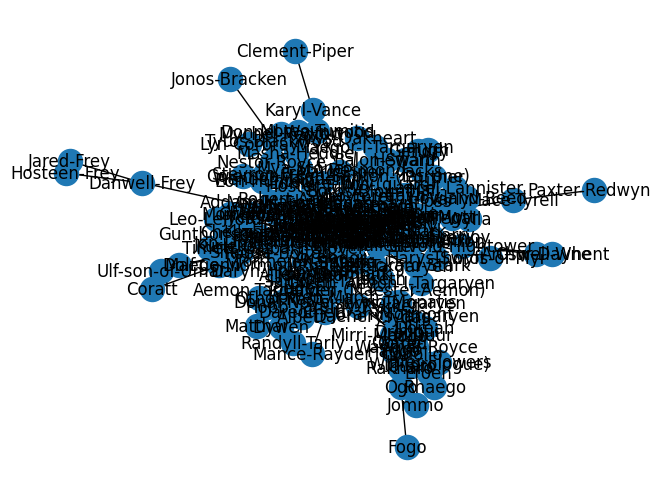

In [146]:
# To add vertex labels
nx.draw(G_symmetric, with_labels=True)


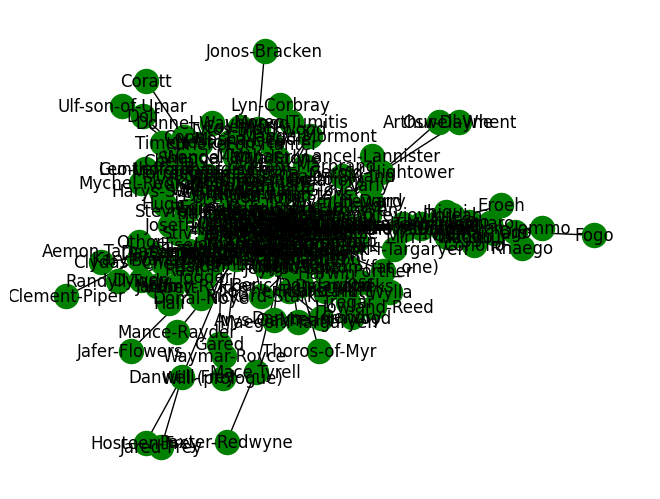

In [147]:
# To add vertex labels and change color
nx.draw(G_symmetric, with_labels=True, node_color='g')


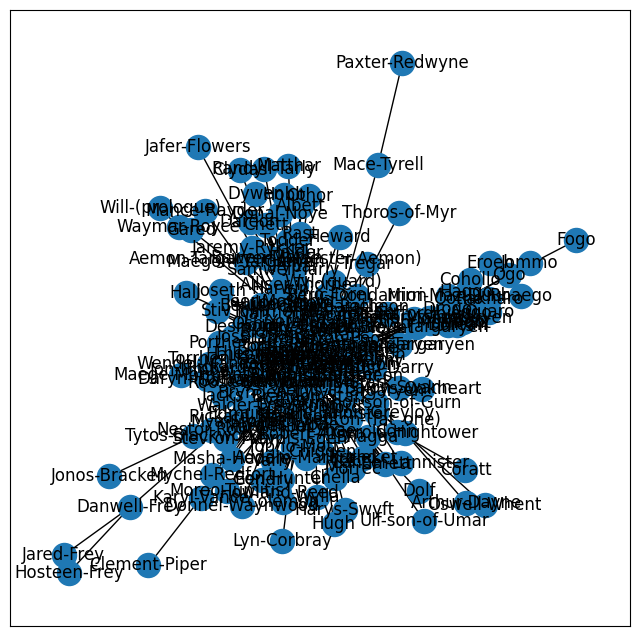

In [148]:
plt.figure(figsize=(8, 8))
nx.draw_networkx(G_symmetric)
plt.show()


When the edges have specific values that depict a feature of every pair of nodes (i.e., the distance between two cities) we say that we have a weighted graph. This type of graph is extremely useful for creating a more accurate representation of a network. For example, in our network we assigned weights to the edges by taking the weight number from the data set. Here it was: **G_symmetric = nx.from_pandas_edgelist(df, source="Source", target="Target", edge_attr='weight')**


In [149]:
weights = [i['weight'] for i in dict(G_symmetric.edges).values()]
weights


[3,
 6,
 5,
 4,
 7,
 9,
 16,
 27,
 4,
 3,
 3,
 3,
 12,
 5,
 4,
 4,
 3,
 6,
 7,
 4,
 3,
 9,
 24,
 3,
 12,
 3,
 36,
 16,
 3,
 3,
 4,
 3,
 7,
 10,
 18,
 6,
 3,
 3,
 9,
 3,
 4,
 4,
 9,
 13,
 4,
 4,
 3,
 40,
 4,
 8,
 5,
 4,
 11,
 7,
 15,
 101,
 5,
 5,
 12,
 24,
 25,
 26,
 17,
 75,
 31,
 18,
 5,
 4,
 4,
 11,
 5,
 37,
 10,
 11,
 30,
 3,
 28,
 3,
 19,
 11,
 64,
 7,
 69,
 3,
 4,
 3,
 4,
 3,
 3,
 10,
 5,
 4,
 3,
 6,
 4,
 4,
 26,
 47,
 38,
 32,
 5,
 12,
 16,
 19,
 12,
 3,
 11,
 3,
 81,
 4,
 33,
 4,
 33,
 10,
 4,
 4,
 16,
 291,
 7,
 10,
 34,
 18,
 6,
 5,
 7,
 15,
 5,
 4,
 21,
 4,
 61,
 12,
 3,
 3,
 4,
 4,
 9,
 5,
 13,
 34,
 5,
 3,
 3,
 4,
 10,
 32,
 4,
 5,
 8,
 7,
 8,
 10,
 3,
 4,
 6,
 9,
 4,
 4,
 3,
 11,
 81,
 4,
 8,
 23,
 3,
 5,
 37,
 41,
 56,
 14,
 4,
 6,
 7,
 4,
 31,
 23,
 5,
 7,
 10,
 3,
 10,
 3,
 4,
 5,
 45,
 8,
 11,
 53,
 18,
 3,
 81,
 8,
 8,
 13,
 56,
 6,
 8,
 6,
 11,
 5,
 3,
 4,
 4,
 3,
 3,
 12,
 4,
 14,
 3,
 5,
 4,
 3,
 4,
 4,
 7,
 11,
 7,
 3,
 12,
 4,
 11,
 32,
 13,
 5,
 5,
 4,
 8,
 4,


#### Visualization of a weighted graph


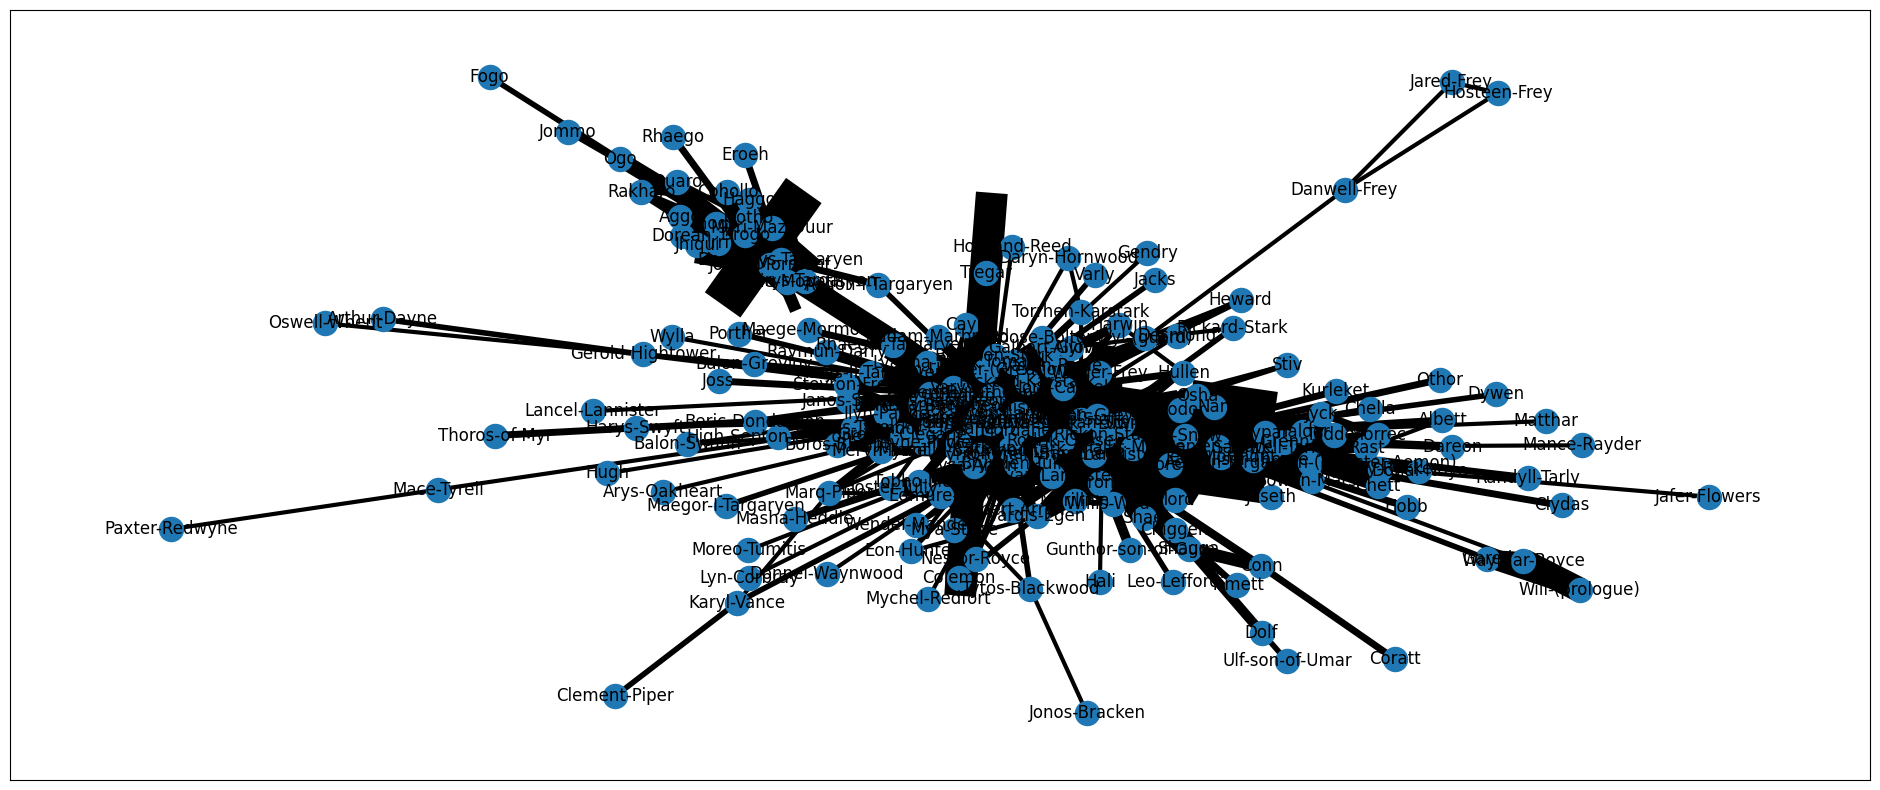

In [150]:
fig, ax = plt.subplots(figsize=(24, 10))
pos = nx.spring_layout(G_symmetric)
nx.draw_networkx_nodes(G_symmetric, pos, ax=ax)
nx.draw_networkx_edges(G_symmetric, pos, width=weights, ax=ax)
_ = nx.draw_networkx_labels(G_symmetric, pos, ax=ax)


In the plot you can see how the sizes of the lines between the nodes change as a function of the weights.


In [151]:
edgesWithWeights = []
for i, edge in enumerate(G_symmetric.edges):
    edge = (*edge, weights[i])
    edgesWithWeights.append(edge)

edgesWithWeights


[('Addam-Marbrand', 'Jaime-Lannister', 3),
 ('Addam-Marbrand', 'Tywin-Lannister', 6),
 ('Jaime-Lannister', 'Aerys-II-Targaryen', 5),
 ('Jaime-Lannister', 'Barristan-Selmy', 4),
 ('Jaime-Lannister', 'Brynden-Tully', 7),
 ('Jaime-Lannister', 'Catelyn-Stark', 9),
 ('Jaime-Lannister', 'Cersei-Lannister', 16),
 ('Jaime-Lannister', 'Eddard-Stark', 27),
 ('Jaime-Lannister', 'Edmure-Tully', 4),
 ('Jaime-Lannister', 'Galbart-Glover', 3),
 ('Jaime-Lannister', 'Gregor-Clegane', 3),
 ('Jaime-Lannister', 'Harys-Swyft', 3),
 ('Jaime-Lannister', 'Joffrey-Baratheon', 12),
 ('Jaime-Lannister', 'Jon-Arryn', 5),
 ('Jaime-Lannister', 'Jory-Cassel', 4),
 ('Jaime-Lannister', 'Kevan-Lannister', 4),
 ('Jaime-Lannister', 'Loras-Tyrell', 3),
 ('Jaime-Lannister', 'Lysa-Arryn', 6),
 ('Jaime-Lannister', 'Petyr-Baelish', 7),
 ('Jaime-Lannister', 'Renly-Baratheon', 4),
 ('Jaime-Lannister', 'Rickard-Karstark', 3),
 ('Jaime-Lannister', 'Robb-Stark', 9),
 ('Jaime-Lannister', 'Robert-Baratheon', 24),
 ('Jaime-Lannister'

In [152]:
G_weighted = nx.DiGraph()
G_weighted.add_weighted_edges_from(ebunch_to_add=edgesWithWeights)


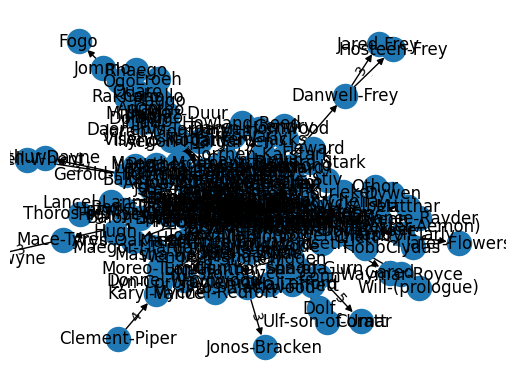

In [153]:
edge_labels = dict([((u, v,), d["weight"]) for
                    u, v, d in G_weighted.edges(data=True)])

nx.draw_networkx_edge_labels(G_weighted, pos,
                             edge_labels=edge_labels)
nx.draw_networkx(G_weighted, pos)

pos = nx.spring_layout(G_weighted)
x_values, y_values = zip(*pos.values())
x_max = max(x_values)
x_min = min(x_values)
x_margin = (x_max - x_min) * 0.0001
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.box(False)
plt.show()


In [154]:
elarge = [(u, v)
          for (u, v, d) in G_weighted.edges(data=True) if d['weight'] > 100]
elarge


[('Eddard-Stark', 'Robert-Baratheon'),
 ('Daenerys-Targaryen', 'Drogo'),
 ('Arya-Stark', 'Sansa-Stark'),
 ('Bran-Stark', 'Robb-Stark')]

In [155]:
pos = nx.circular_layout(G_weighted)  # positions for all nodes
pos

{'Addam-Marbrand': array([1.00000000e+00, 1.55386441e-09]),
 'Jaime-Lannister': array([0.9994356, 0.0335936]),
 'Tywin-Lannister': array([0.99774295, 0.06714928]),
 'Aerys-II-Targaryen': array([0.99492401, 0.10062915]),
 'Barristan-Selmy': array([0.99098194, 0.13399543]),
 'Brynden-Tully': array([0.9859212 , 0.16721046]),
 'Catelyn-Stark': array([0.97974753, 0.20023672]),
 'Cersei-Lannister': array([0.9724679 , 0.23303695]),
 'Eddard-Stark': array([0.96409047, 0.2655741 ]),
 'Edmure-Tully': array([0.95462471, 0.29781151]),
 'Galbart-Glover': array([0.94408131, 0.32971269]),
 'Gregor-Clegane': array([0.93247223, 0.36124167]),
 'Harys-Swyft': array([0.91981053, 0.39236287]),
 'Joffrey-Baratheon': array([0.90611047, 0.42304117]),
 'Jon-Arryn': array([0.89138758, 0.45324192]),
 'Jory-Cassel': array([0.87565839, 0.48293099]),
 'Kevan-Lannister': array([0.85894078, 0.51207495]),
 'Loras-Tyrell': array([0.84125352, 0.54064077]),
 'Lysa-Arryn': array([0.82261664, 0.56859643]),
 'Petyr-Baelish'

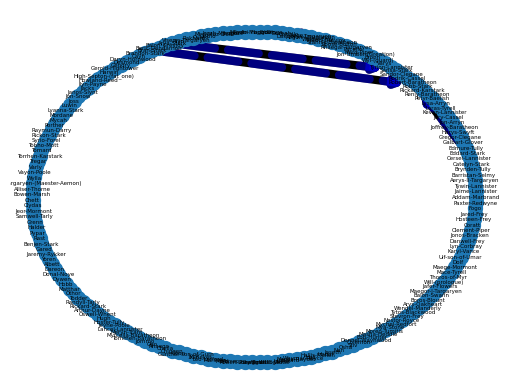

In [156]:
# nodes
nx.draw_networkx_nodes(G_weighted, pos, node_size=100)

# edges
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(G_weighted, pos, edgelist=elarge,
                       width=6, alpha=0.5, edge_color='b', style='dashed')
# labels
nx.draw_networkx_labels(G_weighted, pos, font_size=4,
                        font_family='sans-serif')
plt.axis('off')
plt.show()
